## Exploration for Sentiment Analysis

Creates a Word Cloud of each restaurant's reviews, vectorized with BoW

### To-Do

- Overall word counts
- Sentiment color coding

In [1]:
%load_ext autoreload
%autoreload 2

#pandas and numpy for df manipulation
import pandas as pd
import numpy as np
import re
import nltk
import statistics

#Preprocessing
from utils import pipeline_v1e
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from textblob import TextBlob
sent_tokenizer = PunktSentenceTokenizer()

#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#Classification and Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from tqdm import tqdm

In [8]:
reviews = pd.read_csv('data_hyderabad/10k_reviews.csv')
reviews.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8899,Domino's Pizza,Vinay Payala,good,5,"3 Reviews , 35 Followers",7/14/2018 16:16,0
1963,Pakwaan Grand,Rama,delivery on time,5,2 Reviews,11/7/2018 21:07,0
3542,Green Bawarchi Restaurant,Rakesh Das,worst I ever had .,1,"4 Reviews , 1 Follower",9/19/2018 22:10,0
4518,Owm Nom Nom,Venkata Sai,The service is not good. The plates are not cl...,1,"2 Reviews , 2 Followers",2/10/2019 17:06,1
6736,Yum Yum Tree - The Arabian Food Court,Yashwanth Kotha,The food quality has gone down compared to its...,2,"3 Reviews , 4 Followers",11/23/2018 12:56,0


In [9]:
reviews.drop(['Reviewer', 'Metadata', 'Time', 'Pictures', 'Rating'], axis=1, inplace=True)
reviews.dropna(subset=["Review"], inplace=True)
reviews.sample(5)

,Restaurant,Review
4029,Frio Bistro,I was at this bistro for dinner with my friend...
2894,Behrouz Biryani,food is very good... but delivery is bit late....
215,Flechazo,I have given my b'day treat to my friends. Guy...
1378,The Lal Street - Bar Exchange,I liked the atmosphere of the restaurant. The ...
7637,The Old Madras Baking Company,Undoubtedly one of the best bakeries in hyd . ...


In [15]:
reviews_per_restaurant = reviews.groupby('Restaurant')['Review'].apply(list).to_dict()

In [16]:
print("Total unique names:", len(reviews_per_restaurant))
print("Sample structure:")
for name, reviews in list(reviews_per_restaurant.items())[:5]:
    print(f"Restaurant: {name}, Number of Reviews: {len(reviews)}")

Total unique names: 100
Sample structure:
Restaurant: 10 Downing Street, Number of Reviews: 100
Restaurant: 13 Dhaba, Number of Reviews: 100
Restaurant: 3B's - Buddies, Bar & Barbecue, Number of Reviews: 100
Restaurant: AB's - Absolute Barbecues, Number of Reviews: 100
Restaurant: Absolute Sizzlers, Number of Reviews: 100


In [23]:
def generate_word_cloud_from_reviews(reviews_list):
    '''
    Generates a word cloud from a list of review texts
    Input: reviews_list (list of str): List of review texts
    Output: PIL.Image: Word cloud image generated from the reviews
    '''
    reviews_df = pd.DataFrame(reviews_list, columns=["Review"])

    # Vectorize the reviews to get trigrams
    trigram_bow_vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r"(?u)\b\w+\b")
    reviews_bow_td_matrix = trigram_bow_vectorizer.fit_transform(reviews_df["Review"]).toarray()
    reviews_bow_word_list = trigram_bow_vectorizer.get_feature_names_out()

    # Calculate word frequencies
    reviews_raw_vocabulary = pipeline_v1e.word_freq_calculator(reviews_bow_td_matrix, reviews_bow_word_list, df_output=False)
    
    # Generate the word cloud
    wc = WordCloud(background_color="white", max_words=120, width=220, height=220, color_func=lambda *args, **kwargs: (0, 0, 0))
    wc.generate_from_frequencies(reviews_raw_vocabulary)
    
    return wc.to_image()

In [24]:
# Dictionary to store word cloud images for each name
word_cloud_images = {}

for name, reviews_list in reviews_per_restaurant.items():
    word_cloud_images[name] = generate_word_cloud_from_reviews(reviews_list)

# Now word_cloud_images[name] will hold the word cloud image for each name


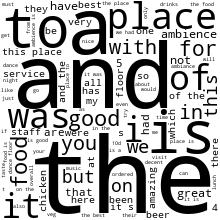

In [25]:
word_cloud_images['10 Downing Street']